In [7]:
from array import array
import math
import numpy as np
import random

# Non-Linear Fitting Matrix Approach

We now turn our attention to the problem of fitting a non-linear function to a set of data points.

As before, we define the goodness of fit as the sum of the squares of the residuals divided by the square of the uncertainty in the data points.  We will use the same approach as before, but now we will fit the data to a non-linear function.

The goodness of fit is defined as:

$$\chi^2 = \sum_{i=1}^{m} \left( \frac{y_i - f(x_i,\beta_1,\beta_2,...)}{\sigma_i} \right)^2$$

where $m$ is the number of data points, $y_i$ is the measured value of the dependent variable, $x_i$ is the measured value of the independent variable, $\sigma_i$ is the uncertainty in the measured value of the dependent variable, and $f(x_i,\beta_1,\beta_2,...)$ is the non-linear function that we are fitting to the data.  The $\beta$'s are the parameters of the non-linear function that we are fitting to the data.

To find the minimum of the goodness of fit, we take the derivative of the goodness of fit with respect to each of the parameters and set them equal to zero.  This gives us a set of $n$ equations that we can solve for the $n$ parameters.  The equations are:

$$\frac{\partial \chi^2}{\partial \beta_1} = 0$$
$$\frac{\partial \chi^2}{\partial \beta_2} = 0$$
$$...$$
$$\frac{\partial \chi^2}{\partial \beta_n} = 0$$

Using the expression above for the goodness of fit, the derivatives are:

$$\frac{\partial \chi^2}{\partial \beta_1} = -2 \sum_{i=1}^{m} \left( \frac{y_i - f(x_i,\beta_1,\beta_2,...)}{\sigma_i} \right) \frac{\partial f(x_i,\beta_1,\beta_2,...)}{\partial \beta_1}$$
$$\frac{\partial \chi^2}{\partial \beta_2} = -2 \sum_{i=1}^{m} \left( \frac{y_i - f(x_i,\beta_1,\beta_2,...)}{\sigma_i} \right) \frac{\partial f(x_i,\beta_1,\beta_2,...)}{\partial \beta_2}$$
$$...$$
$$\frac{\partial \chi^2}{\partial \beta_n} = -2 \sum_{i=1}^{m} \left( \frac{y_i - f(x_i,\beta_1,\beta_2,...)}{\sigma_i} \right) \frac{\partial f(x_i,\beta_1,\beta_2,...)}{\partial \beta_n}$$

In this situation, we must solve these equations iteratively, using the method known as Newton's method.  We start with an initial guess for the parameters, $\beta_1^0$, $\beta_2^0$, ..., $\beta_n^0$.  We then calculate the derivatives of the function at this point, and solve the equations above for the parameters.  This gives us a new set of parameters, $\beta_1^1$, $\beta_2^1$, ..., $\beta_n^1$.  We then calculate the derivatives of the function at this point, and solve the equations above for the parameters.  This gives us a new set of parameters, $\beta_1^2$, $\beta_2^2$, ..., $\beta_n^2$.  We continue this process until the parameters converge to a set of values that satisfy the equations above.   

This results in a matrix equation involving the so-called Jacobian matrix, $J$, which is defined as:

$$J_{ij} = \frac{\partial f(x_i,\beta_1,\beta_2,...)}{\partial \beta_j}$$

The matrix equation is:

$$J^T W J \Delta \beta = J^T W r$$

where $J^T$ is the transpose of the Jacobian matrix, $W$ is the weight matrix, $r$ is the residual vector, and $\Delta \beta$ is the change in the parameters.  The weight matrix is defined as:

$$W_{ij} = \frac{1}{\sigma_i^2} \delta_{ij}$$

where $\delta_{ij}$ is the Kronecker delta function.  The residual vector is defined as:

$$r_i = y_i - f(x_i,\beta_1,\beta_2,...)$$

The solution to this matrix equation is:

$$\Delta \beta = (J^T W J)^{-1} J^T W r$$

We then update the parameters as:

$$\beta_j = \beta_j - \Delta \beta_j$$

We continue this process until the parameters converge to a set of values that satisfy the equations above.  The convergence is determined by calculating the change in the parameters, $\Delta \beta_j$, and comparing it to the parameters, $\beta_j$.  If the change in the parameters is less than some small value, $\epsilon$, then the parameters have converged.
    





















In [49]:
def fitfunction(x,*par):
    return par[0]*x/(par[1]+x)

In [50]:
def jacobian_beta1(x,*par):
    return -x/(par[1]+x)

In [51]:
def jacobian_beta2(x,*par):
    return par[0]*x/((par[1]+x)*(par[1]+x))

In [52]:
par_actual = array('d')
par_actual.append(0.3797)
par_actual.append(0.5111)

beta_order = 2 #Set the order of the polynomial
m = 7 #Set the number of data points
x = array('d')
y = array('d')
ex = array('d')
ey = array('d')

x.append(0.038)
x.append(0.194)
x.append(0.425)
x.append(0.626)
x.append(1.253)
x.append(2.500)
x.append(3.740)

In [53]:
random.seed(1)

for i in range(0,m):
    r = random.gauss(0.0,0.005)
    y.append(fitfunction(x[i],*par_actual)+r)
    ex.append(0)
    ey.append(0.005)

In [54]:
n = beta_order

Jacobian = np.zeros(shape = (m,n))
Jacobian2 = np.zeros(shape = (m,n))
JacobianT = np.zeros(shape = (n,m))
Weights = np.zeros(shape = (m,m))
JTW = np.zeros(shape = (n,m))
WJ = np.zeros(shape = (m,n))
residuals = np.zeros(shape = (m,1))
JTWr = np.zeros(shape = (n,1))
JTWJ = np.zeros(shape = (n,n))
JTWJInv = np.zeros(shape = (n,n))

betas = np.zeros(shape = (n,1))
Delta = np.zeros(shape = (n,1))

In [55]:
betas[0][0] = 0.90
betas[1][0] = 0.20

parameter_matrix = array('d')
parameter_matrix_dbeta = array('d')
parameter_matrix.append(betas[0][0])
parameter_matrix.append(betas[1][0])
parameter_matrix_dbeta.append(betas[0][0])
parameter_matrix_dbeta.append(betas[1][0])

dbetamax = 10000
dbeta = 0
epsilon = 0.000001
epsilon_beta = 0.005

jacobian_flag = 1

In [56]:
while (dbetamax > epsilon):
    for i in range(0,m):
        function_value = fitfunction(x[i],*parameter_matrix)
        residuals[i][0]=y[i]-function_value
        
        for k in range(0,m):
            if (i==k):
                Weights[i][k]=1.0/(ey[i]*ey[i])
            else:
                Weights[i][k]=0.0
                
        if (jacobian_flag == 1):
            for j in range(0,n):
                for k in range(0,n):
                    if (k==j):
                        parameter_matrix_dbeta[k]=parameter_matrix[k]+epsilon_beta
                    else:
                        parameter_matrix_dbeta[k]=parameter_matrix[k]
                f0 = fitfunction(x[i],*parameter_matrix)
                f1 = fitfunction(x[i],*parameter_matrix_dbeta)
                jacobian = (f0-f1)/epsilon_beta
                Jacobian[i][j]=jacobian
                #print(i,j,jacobian)
                #print(parameter_matrix[0],parameter_matrix_dbeta[0])
                #print(parameter_matrix[1],parameter_matrix_dbeta[1])
                #print(f0,f1)    
        else:
            for j in range(0,n):
                if (j==0):
                    jacobian = jacobian_beta1(x[i],*parameter_matrix)
                else:
                    jacobian = jacobian_beta2(x[i],*parameter_matrix)
                Jacobian[i][j]=jacobian
                #print(i,j,jacobian)
            
    JacobianT = Jacobian.transpose()
    JTW = np.array(np.matrix(JacobianT)*np.matrix(Weights))
    JTWr = np.array(np.matrix(JTW)*np.matrix(residuals))
    WJ = np.array(np.matrix(Weights)*np.matrix(Jacobian))
    JTWJ = np.array(np.matrix(JacobianT)*np.matrix(WJ))
    JTWJInv = np.array(np.linalg.inv(JTWJ))
    Delta = np.array(np.matrix(JTWJInv)*np.matrix(JTWr))

    dbetamax = 0.0
    
    for j in range(0,n):
        parameter_matrix[j]=parameter_matrix[j]-Delta[j][0]
        dbeta = math.fabs(Delta[j][0]/parameter_matrix[j])
        if (dbeta > dbetamax): 
            dbetamax = dbeta
        #print ("dbetamax = %f" % dbetamax )

In [57]:
print(Jacobian)
print(" ")

print(JacobianT)
print(" ")

print(JTWr)
print(" ")

print(JTWJ)
print(" ")

print(JTWJInv)
print(" ")


[[-0.07288012  0.05141082]
 [-0.28638737  0.1558393 ]
 [-0.46785342  0.19020048]
 [-0.56426685  0.18802111]
 [-0.72160619  0.15387408]
 [-0.83796893  0.10412461]
 [-0.88554158  0.07776734]]
 
[[-0.07288012 -0.28638737 -0.46785342 -0.56426685 -0.72160619 -0.83796893
  -0.88554158]
 [ 0.05141082  0.1558393   0.19020048  0.18802111  0.15387408  0.10412461
   0.07776734]]
 
[[-0.00048757]
 [-0.00017548]]
 
[[105268.17817261 -20424.52611625]
 [-20424.52611625   5560.96192737]]
 
[[3.30555000e-05 1.21407579e-04]
 [1.21407579e-04 6.25735674e-04]]
 


In [58]:
error_sum = 0
yfit = 0
error = array('d')

for j in range(0,m):
    yfit = fitfunction(x[j],*parameter_matrix)
    print ("i x y fit = %d %f %f %f " % (j,x[j],y[j],yfit))
    error_sum = error_sum + (yfit-y[j])*(yfit-y[j])/(ey[j]*ey[j])
    yfit = 0

print (" ")
    
chi2 = error_sum/(m-n)
print ("chi2/dof = %f / %f" % (error_sum,(m-n)))

for k in range(0,n):
        error.append(math.sqrt(JTWJInv[k][k]))
        print(" beta[%d] = %f +/- %f" % ((k+1),parameter_matrix[k],error[k]))


i x y fit = 0 0.038000 0.032718 0.027063 
i x y fit = 1 0.194000 0.111717 0.106345 
i x y fit = 2 0.425000 0.172720 0.173730 
i x y fit = 3 0.626000 0.205211 0.209531 
i x y fit = 4 1.253000 0.264231 0.267957 
i x y fit = 5 2.500000 0.315407 0.311166 
i x y fit = 6 3.740000 0.328939 0.328832 
 
chi2/dof = 4.495800 / 5.000000
 beta[1] = 0.371334 +/- 0.005749
 beta[2] = 0.483404 +/- 0.025015


[0.37131744 0.48331875] [[2.95647157e-05 1.07953631e-04]
 [1.07953631e-04 5.54319840e-04]]
Coefficients (from curve_fit)
[0.37131744 0.48331875]
Covariance Matrix (from curve_fit)
[[2.95647157e-05 1.07953631e-04]
 [1.07953631e-04 5.54319840e-04]]
Chi^2 / dof = 4.496E+00 / 5
Fit Parameter 0: 3.713E-01 +/- 5.437E-03
0 1 8.433E-01
Fit Parameter 1: 4.833E-01 +/- 2.354E-02


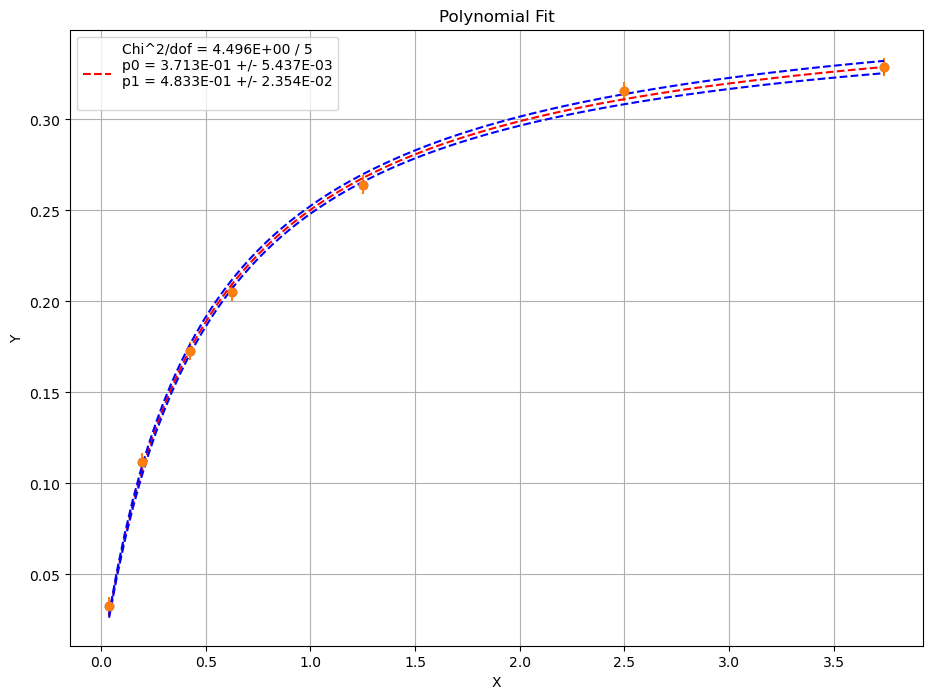

In [94]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

x = np.array(x)
y = np.array(y)
ex = np.array(ex)
ey = np.array(ey)

fig = plt.figure(figsize=(11,8))
ax1 = fig.add_subplot(111)

ax1.set_title("Polynomial Fit")
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_yscale("linear")
ax1.grid(True)

ax1.plot(x,y,'o')

ax1.errorbar(x,y,yerr=ey,fmt='o')

init_vals = [0.3, 0.75]
popt, pcov = curve_fit(fitfunction,x,y,sigma=ey,p0=init_vals,absolute_sigma=False)

print (popt,pcov)

xi = np.linspace(np.min(x),np.max(x),100)
ps = np.random.multivariate_normal(popt,pcov,10000)
ysample=np.asarray([fitfunction(xi,*pi) for pi in ps])
lower = np.percentile(ysample,16.0,axis=0)
upper = np.percentile(ysample,84.0,axis=0)

print("Coefficients (from curve_fit)")
print (popt)
print("Covariance Matrix (from curve_fit)")
print (pcov)

yfit = []
chi2=0
for i in range (0,m):
    yfit.append(fitfunction(x[i],*popt))
    #chi2 += (y[i]-yfit[i])*(y[i]-yfit[i])
    chi2 += (y[i]-yfit[i])*(y[i]-yfit[i])/(ey[i]*ey[i])

print ("Chi^2 / dof = %.3E / %d" % (chi2,m-len(init_vals)))

param = []
rhom = []
param.append(float(chi2))
param.append(m-len(init_vals))
for ii in range(0,len(init_vals)):
    param.append(float(popt[ii]))
    param.append(float(np.sqrt(pcov[ii][ii])))
    print("Fit Parameter %d: %.3E +/- %.3E" % (ii,popt[ii],np.sqrt(pcov[ii][ii])))
    for jj in range(0,len(init_vals)):
        rhom.append(float(pcov[ii][jj])/pow(float(pcov[ii][ii]*pcov[jj][jj]),0.5))
        if jj > ii:
            print("%d %d %.3E" % (ii,jj,rhom[ii*len(init_vals)+jj]))

mylabel = "Chi^2/dof = %.3E / %d\n"
for i in range(0,len(init_vals)):
    code = "p" + str(i)
    mylabel = mylabel + code + " = %.3E +/- %.3E\n"

ax1.plot(xi, fitfunction(xi, *popt), 'r--', label = mylabel % tuple(param))
ax1.plot(xi,lower,'b--')
ax1.plot(xi,upper,'b--')

leg = ax1.legend()
plt.show()

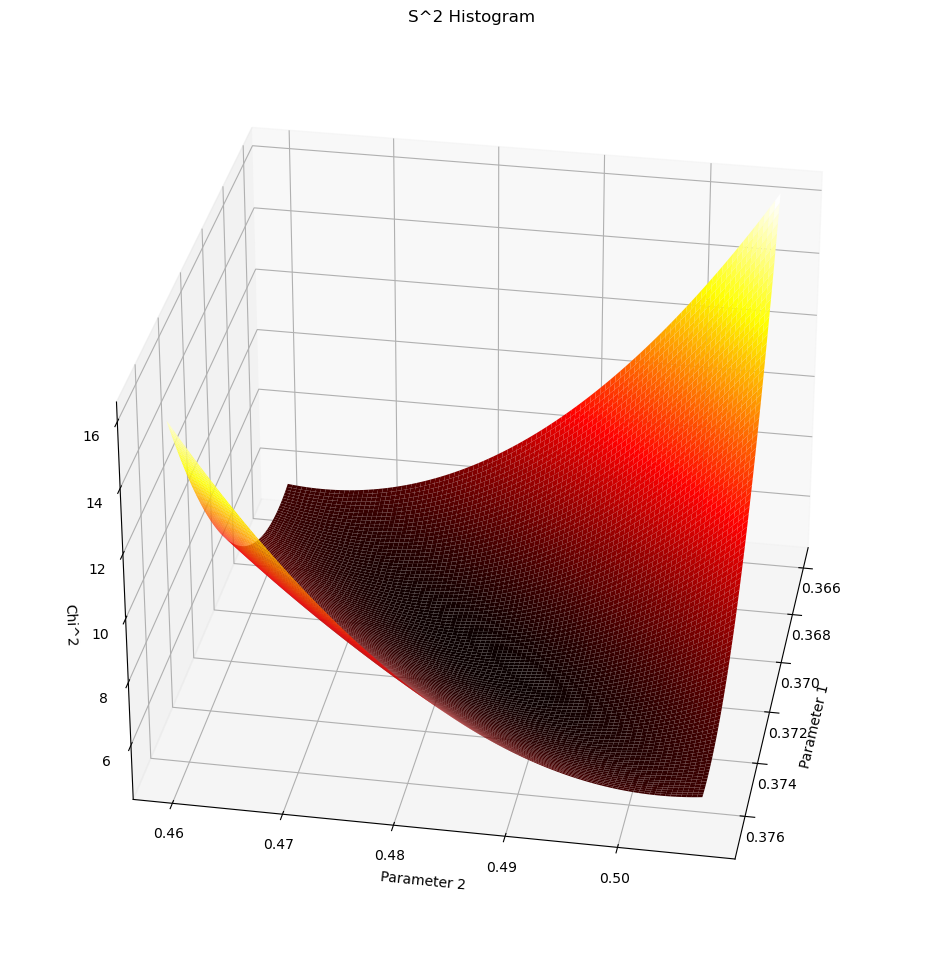

In [103]:
from matplotlib.colors import LogNorm
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

nbins = 101
xwidth = 0.005437
ywidth = 0.02354
xlow = parameter_matrix[0] - xwidth
xhigh = parameter_matrix[0] + xwidth
ylow = parameter_matrix[1] - ywidth
yhigh = parameter_matrix[1] + ywidth

b1 = np.linspace(xlow, xhigh, nbins)
b2 = np.linspace(ylow, yhigh, nbins)
sums = np.zeros((nbins, nbins))

for j in range(nbins):
    for k in range(nbins):
        pars = [b1[j], b2[k]]
        total_sum = 0.0
        for i in range(m):
            #print(i, x[i], y[i], ey[i], fitfunction(x[i], *pars))
            yfit = fitfunction(x[i], *pars)
            total_sum += ((yfit - y[i])/ey[i]) ** 2
        sums[j][k] = total_sum
        

fig = plt.figure(figsize=(15,12))
ax = fig.add_subplot(111, projection='3d')
B1, B2 = np.meshgrid(b1, b2)
ax.plot_surface(B1, B2, sums, rstride=1, cstride=1, cmap='hot', edgecolor='none')
ax.view_init(elev=30.,azim=10.)


# Set labels and title
#ax.set_zscale('log')
ax.set_xlabel('Parameter 1')
ax.set_ylabel('Parameter 2')
ax.set_zlabel('Chi^2')
ax.set_title('S^2 Histogram')

plt.show()


Text(0, 0.5, 'Parameter 2')

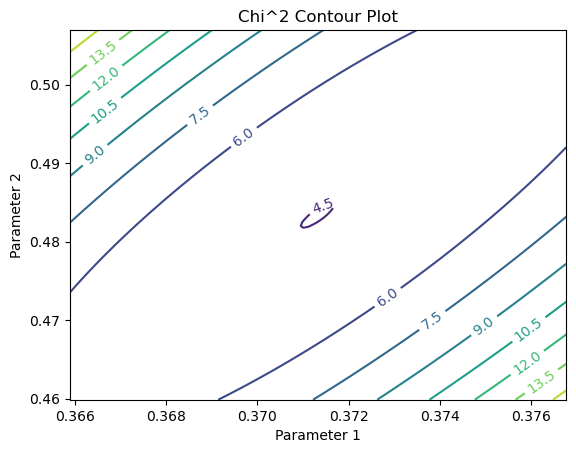

In [105]:
fig, ax = plt.subplots()
CS = ax.contour(B1, B2, sums)
ax.clabel(CS, inline=True, fontsize=10)
ax.set_title('Chi^2 Contour Plot')
ax.set_xlabel('Parameter 1')
ax.set_ylabel('Parameter 2')